In [1]:
using Statistics
using DelimitedFiles
using Plots
using LaTeXStrings
using LinearAlgebra
using LsqFit
using Test

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
using StatsBase

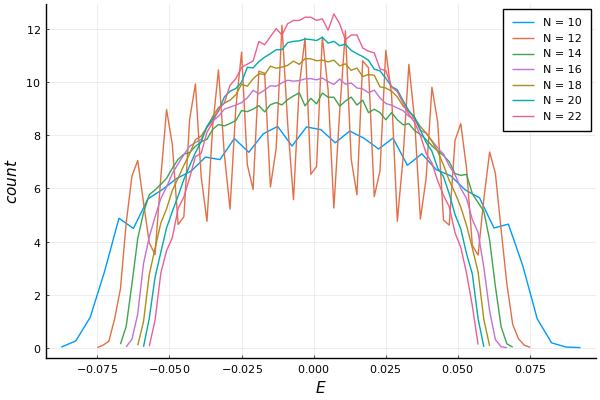

In [8]:
N = Array(range(10, stop = 29, step = 2))
matrix_size = Int.(2 .^ (N ./2))
it_num = [5120, 2560, 1280, 640, 320, 160, 8, 40, 20, 10]
plot()
for i in 1:7
    file_fd = string("eig_saves/EIG_SYK_N", N[i], "_it", it_num[i], ".dat")
    fd1 = readdlm(file_fd);
    fd1 = reshape(fd1, matrix_size[i]*it_num[i]) ./ N[i];
    h = fit(Histogram, fd1, nbins=75)
    h = normalize(h, mode=:pdf)
    r = h.edges[1]
    x = first(r)+step(r)/2:step(r):last(r)
    N_i = N[i]
    plot!(x, h.weights, label = "N = $N_i")
end
ylabel!(L"count")
xlabel!(L"E")